In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"

import numpy as np
import torch
import torch.nn as nn
from torchsummary import summary

import matplotlib.pyplot as plt
%matplotlib inline  

from skimage.transform import resize

In [2]:
# from trainer import run

# model, result = run()
# torch.save(model, 'mnist.pth')

In [3]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

from dataloader import get_dataloader
train_loader, _ = get_dataloader()

idx = 0
batch = next(iter(train_loader))
sample = batch[0][idx][None, ...].to(device=device, dtype=torch.float)
sample_label = batch[1][idx]

In [4]:
from model import CNN
model = CNN().to(device)
model = torch.load('mnist.pth')

In [5]:
from cam import GuidedBackpropRelu, GuidedReluModel
guided_relu = GuidedBackpropRelu.apply
guide = GuidedReluModel(model,nn.ReLU,guided_relu)

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
<built-in method apply of FunctionMeta object at 0x0000015769D2B6C8>
Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
<built-in method apply of FunctionMeta object at 0x0000015769D2B6C8>
AvgPool2d(kernel_size=2, stride=2, padding=0)
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
<built-in method apply of FunctionMeta object at 0x0000015769D2B6C8>
AvgPool2d(kernel_size=2, stride=2, padding=0)
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
<built-in method apply of FunctionMeta object at 0x0000015769D2B6C8>
Linear(in_features=12544, out_features=1000,

In [9]:
image, label = next(iter(train_loader))

x, y_ = image.float().to(device), label.to(device)
x.requires_grad = True

output = guide.forward(x)
output = torch.index_select(output, dim=1, index=y_)
output = torch.sum(output)

output.backward(retain_graph=True)

out_size: torch.Size([128, 28, 28])


In [11]:
guided_img = guide.get_visual(0, x)

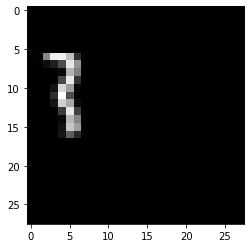

In [18]:
plt.imshow(image[0, 0], cmap='gray')

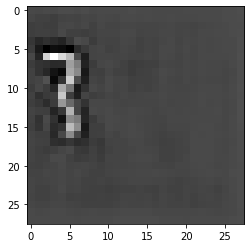

In [19]:
plt.imshow(guided_img, cmap='gray')